# JURNAL MODUL 2

### Import Library

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

### Pemanggilan Gambar

(-0.5, 2721.5, 1293.5, -0.5)

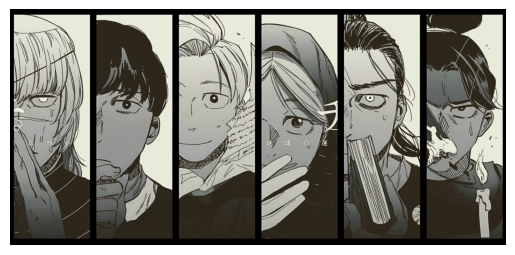

In [39]:
aktivis = plt.imread("Assets/aktivis.jpg")
plt.imshow(aktivis)
plt.axis("off")

### Slicing Gambar

(-0.5, 452.5, 1293.5, -0.5)

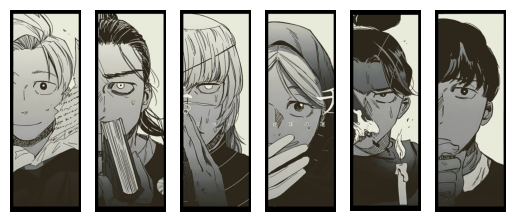

In [40]:
aktivis =plt.imread("Assets/aktivis.jpg")

main3 = aktivis[:,0:453]
main6 = aktivis[:,453:906]
main1 = aktivis[:,906:1359]
main4 = aktivis[:,1359:1812]
main5 = aktivis[:,2265:]
main2 = aktivis[:,1812:2265]

plt.subplot(1,6,1)
plt.imshow(main1)
plt.axis("off")

plt.subplot(1,6,2)
plt.imshow(main2)
plt.axis("off")

plt.subplot(1,6,3)
plt.imshow(main3)
plt.axis("off")

plt.subplot(1,6,4)
plt.imshow(main4)
plt.axis("off")

plt.subplot(1,6,5)
plt.imshow(main5)
plt.axis("off")

plt.subplot(1,6,6)
plt.imshow(main6)
plt.axis("off")

### Merge Gambar

(-0.5, 2721.5, 1293.5, -0.5)

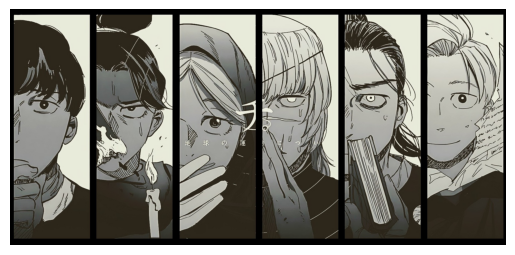

In [41]:
aktivisCombine = np.zeros((aktivis.shape[0], aktivis.shape[1], 3), dtype=np.uint8)

aktivisCombine[:,0:453] = main6
aktivisCombine[:,453:910] = main5
aktivisCombine[:,910:1363] = main4
aktivisCombine[:,1363:1816] = main3
aktivisCombine[:,1816:2269] = main2
aktivisCombine[:,2269:2722] = main1


plt.imshow(aktivisCombine)
plt.axis(False)

### Ekualisasi Gambar

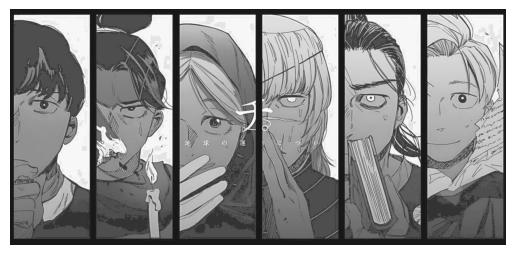

In [42]:
aktivisGray = cv2.cvtColor(aktivisCombine, cv2.COLOR_BGR2GRAY)

def equalize_image(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    L = 256
    equalized_image = np.interp(image.flatten(), range(L), cdf_normalized * (L-1)).reshape(image.shape).astype(np.uint8)
    return equalized_image

equalized = equalize_image(aktivisGray)
gambar_equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

plt.imshow(gambar_equalized)
plt.axis('off')
plt.show()

### Perbandingan Histogram

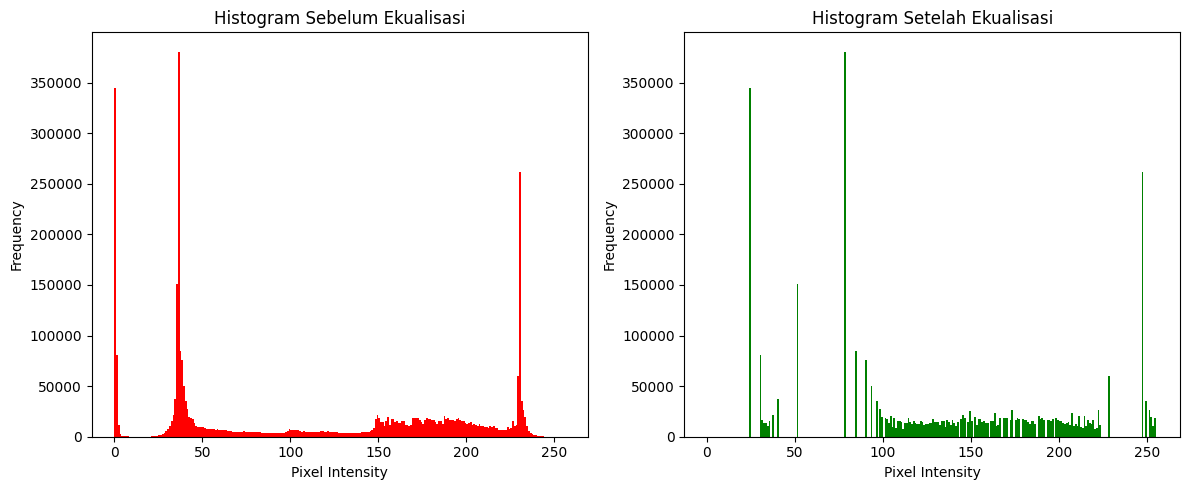

In [47]:
plt.figure(figsize=(12, 5))

# Histogram sebelum ekualisasi
plt.subplot(1, 2, 1)
plt.hist(aktivisGray.flatten(), bins=256, range=[0, 256], color='red')
plt.title('Histogram Sebelum Ekualisasi')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram sesudah ekualisasi
plt.subplot(1, 2, 2)
plt.hist(equalized.flatten(), bins=256, range=[0, 256], color='green')
plt.title('Histogram Setelah Ekualisasi')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Spesifikasi Gambar

(-0.5, 2721.5, 1293.5, -0.5)

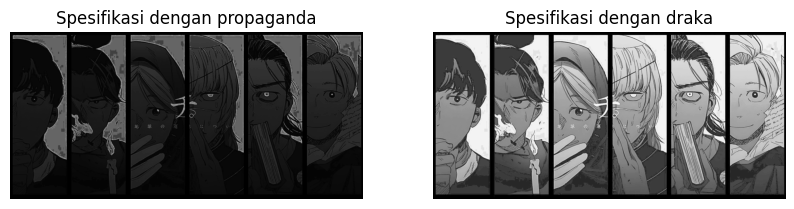

In [49]:
propaganda = plt.imread("Assets/propaganda.jpg")
draka = plt.imread("Assets/draka.jpg")

def spesifikasi(imgInput, imgTarget):
    src_hist, _ = np.histogram(imgInput.flatten(), bins=256, range=[0, 256])
    ref_hist, _ = np.histogram(imgTarget.flatten(), bins=256, range=[0, 256])

    src_cdf = np.cumsum(src_hist).astype(np.float64)
    src_cdf /= src_cdf[-1]
    ref_cdf = np.cumsum(ref_hist).astype(np.float64)
    ref_cdf /= ref_cdf[-1]

    mapping = np.zeros(256, dtype=np.uint8)
    for src_val in range(256):
        diff = np.abs(ref_cdf - src_cdf[src_val])
        mapping[src_val] = np.argmin(diff)
    
    result = mapping[imgInput]
    return result

spesifikasiPropaganda = spesifikasi(equalized, propaganda)
spesifikasiDraka = spesifikasi(equalized, draka)

plt.figure(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(spesifikasiPropaganda, cmap='grey')
plt.title('Spesifikasi dengan propaganda')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(spesifikasiDraka, cmap='grey')
plt.title('Spesifikasi dengan draka')
plt.axis('off')

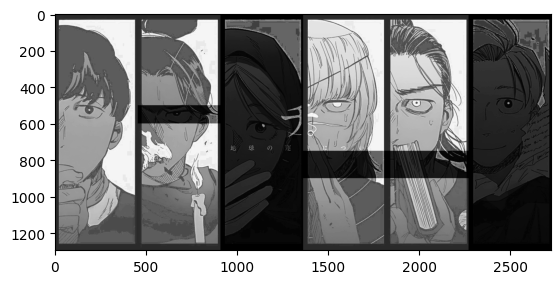

In [ ]:
press_main6 = spesifikasiDraka[:, 0:453]

main5_draka = spesifikasiDraka[0:500, 453:906]
main5_propaganda = spesifikasiPropaganda[500:600, 453:906]
main5_draka2 = spesifikasiDraka[600:, 453:906]
press_main5 = np.vstack((main5_draka, main5_propaganda, main5_draka2))

press_main4 = spesifikasiPropaganda[:, 906:1359]

main3_draka = spesifikasiDraka[0:750, 1359:1812]
main3_propaganda = spesifikasiPropaganda[750:900, 1359:1812]
main3_draka2 = spesifikasiDraka[900:, 1359:1812]
press_main3 = np.vstack((main3_draka, main3_propaganda, main3_draka2)) 

main2_draka = spesifikasiDraka[0:750, 1812:2265]
main2_propaganda = spesifikasiPropaganda[750:900, 1812:2265]
main2_draka2 = spesifikasiDraka[900:, 1812:2265]
press_main2 = np.vstack((main2_draka, main2_propaganda, main2_draka2))

press_main1 = spesifikasiPropaganda[:, 2265:2722]

press_gambar = np.hstack((press_main6, press_main5, press_main4, press_main3, press_main2, press_main1))

plt.imshow(press_gambar, cmap="gray")
plt.axis("off")